# Assignment: Linear Models
## Do three questions.
### `! git clone https://github.com/ds4e/linearModels`

**Q1.** Please answer the following questions in your own words.

1. What makes a model "linear"? "Linear" in what?


A model is called linear when it is linear in its parameters, or coefficients, not necessarily in the variables themselves. That means the predicted output is a linear combination of the parameters multiplied by the input features.

2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)


If you include an intercept, you omit one category (the baseline) to avoid multicollinearity. The coefficients for the other categories then represent how much the predicted outcome differs from that baseline.
If you do not include an intercept, you can keep all 𝑘 dummy variables, and each coefficient represents the predicted value when that category is "on" (since there’s no baseline or reference group).


3. Can linear regression be used for classification? Explain why, or why not.


Linear regression is not ideal for classification because it doesn't constrain predictions to lie between 0 and 1. However, you could use linear regression to predict a continuous variable and then set a threshold (i.e. 0.5) for classification. Logistic regression is preferred, though, because it models the log-odds and naturally bounds outputs between 0 and 1, which aligns with probability interpretations.

4. What are signs that your linear model is over-fitting?


Overfitting means your model fits the training data too well, but performs poorly on new data. Some of the signs overfitting is occuring are a large gap between training and test mean squared errors (MSE), the model includes many variables that aren't statistically significant, and the model reacts too sensitively to small changes in the input data.

5. Clearly explain multi-colinearity using the two-stage least squares technique.


Multicollinearity happens when predictor variables are highly correlated with each other, making it hard to isolate their individual effects. This causes coefficient estimates to be unstable and have high variance. 

In two-stage least squares (2SLS):

Stage 1: Regress the problematic variable (the one suspected of multicollinearity) on instruments—variables that are correlated with the problematic predictor but not with the error term.

Stage 2: Use the predicted values from Stage 1 (which are purged of multicollinearity) in the main regression model.

6. How can you incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$ into your analysis?


To incorporate nonlinear relationships between your outcome variable y and predictors x, you can use feature engineering to transform your input variables. This includes adding polynomial terms like 
𝑥
2
, 
𝑥
3
, or creating interaction terms (e.g., 
𝑥
1
×
𝑥
2
) to capture combined effects. One can also apply logarithmic, exponential, or square root transformations to the features to better model curved relationships within a linear framework.

7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

Intercept (𝛽0): The predicted value of 𝑦 when all predictors are zero. 

Slope coefficient (𝛽𝑖): The change in the predicted value of 𝑦 for a one-unit increase in 𝑥𝑖, holding all other variables constant.

Dummy variable coefficient: The difference in the predicted outcome relative to the reference (baseline) category, assuming an intercept is included.

**Q2.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.


Average Price and Review Scores by Neighbourhood:
   Neighbourhood       Price  Review Scores Rating
2      Manhattan  183.664286             91.801496
4  Staten Island  146.166667             90.843750
1       Brooklyn  127.747378             92.363497
3         Queens   96.857233             91.549057
0          Bronx   75.276498             91.654378

Most expensive borough on average: Manhattan


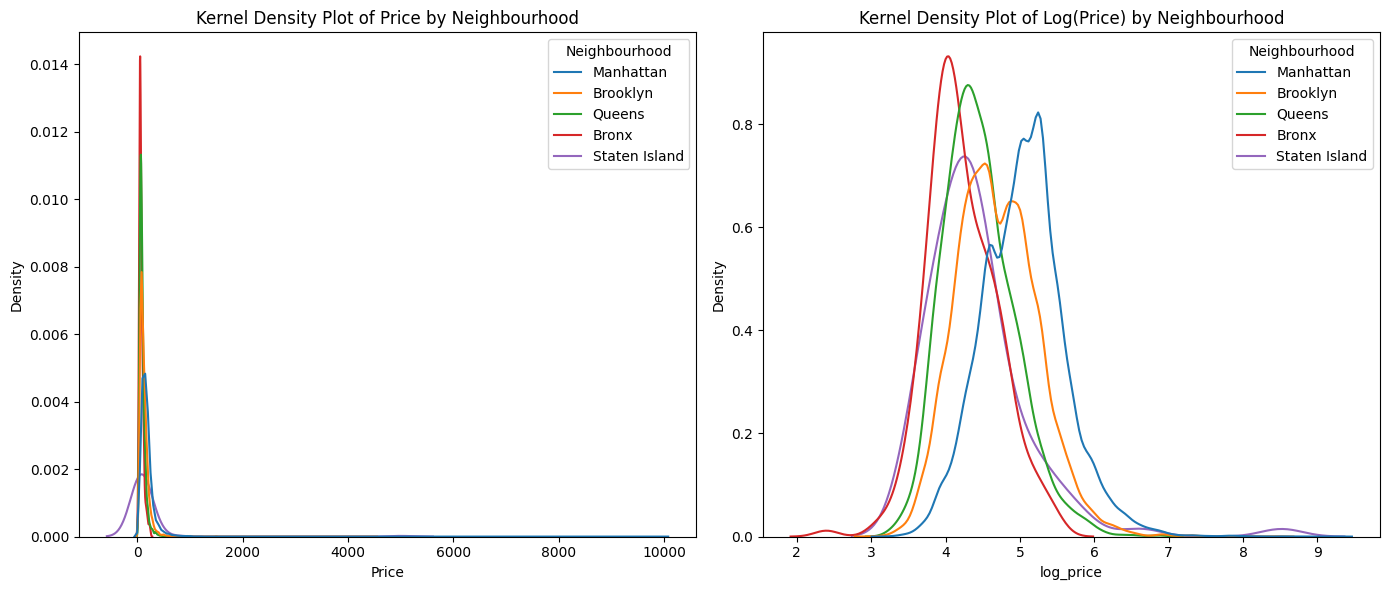

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "./data/Q1_clean.csv"
df = pd.read_csv(file_path)

# The neighbourhood column has a space after it, so I renamed the column to remove the space
df.rename(columns={'Neighbourhood ': 'Neighbourhood'}, inplace=True)

# Computing average prices and scores by neighbourhood
grouped = df.groupby('Neighbourhood')[['Price', 'Review Scores Rating']].mean().reset_index()

print("Average Price and Review Scores by Neighbourhood:")
print(grouped.sort_values(by='Price', ascending=False))

# Finding the most expensive borough
most_expensive = grouped.loc[grouped['Price'].idxmax()]
print(f"\nMost expensive borough on average: {most_expensive['Neighbourhood']}")

# Kernel density plots
plt.figure(figsize=(14, 6))

# Plot raw price
plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x='Price', hue='Neighbourhood', common_norm=False)
plt.title('Kernel Density Plot of Price by Neighbourhood')

# Plot log price 
df['log_price'] = np.log1p(df['Price'])

plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x='log_price', hue='Neighbourhood', common_norm=False)
plt.title('Kernel Density Plot of Log(Price) by Neighbourhood')

plt.tight_layout()
plt.show()

2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?


In [22]:
from sklearn.linear_model import LinearRegression

# create dummies
dummies = pd.get_dummies(df['Neighbourhood'], drop_first=False)

model = LinearRegression(fit_intercept=False)
model.fit(dummies, df['Price'])

coef_df = pd.DataFrame({
    'Neighbourhood': dummies.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("Regression Coefficients (No Intercept):")
print(coef_df)


Regression Coefficients (No Intercept):
   Neighbourhood  Coefficient
2      Manhattan   183.664286
4  Staten Island   146.166667
1       Brooklyn   127.747378
3         Queens    96.857233
0          Bronx    75.276498


Each coefficient matches the average price (from question 1) of its corresponding borough. In a linear regression without an intercept, regressing a continuous variable on a categorical variable (via dummies) results in each coefficient equaling the group mean of the dependent variable.

3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?


In [23]:
dummies = pd.get_dummies(df['Neighbourhood'], drop_first=True)

model = LinearRegression(fit_intercept=True)
model.fit(dummies, df['Price'])

coef_df = pd.DataFrame({
    'Neighbourhood': dummies.columns,
    'Coefficient': model.coef_
})
intercept = model.intercept_

print("Intercept (mean price of baseline group):", round(intercept, 2))
print("\nCoefficients (differences from baseline):")
print(coef_df)

Intercept (mean price of baseline group): 75.28

Coefficients (differences from baseline):
   Neighbourhood  Coefficient
0       Brooklyn    52.470881
1      Manhattan   108.387789
2         Queens    21.580735
3  Staten Island    70.890169


The coefficients are the difference from reference group, so to get the coefficients from part 2, add each coefficient from above to the intercept.


4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

X = pd.get_dummies(df[['Review Scores Rating', 'Neighbourhood']], drop_first=True)
y = df['Price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

coef_rating = model.coef_[X.columns.get_loc('Review Scores Rating')]

property_cols = [col for col in X.columns if col.startswith('Property Type_')]
property_coefs = pd.Series(model.coef_, index=X.columns)[property_cols]

most_expensive_type = df.groupby('Property Type')['Price'].mean().sort_values(ascending=False).index[0]

print(f"R² on test set: {r2:.3f}")
print(f"RMSE on test set: {rmse:.2f}")
print(f"Coefficient on 'Review Scores Rating': {coef_rating:.2f}")
print(f"Most expensive property type: {most_expensive_type}")


R² on test set: 0.046
RMSE on test set: 140.92
Coefficient on 'Review Scores Rating': 1.21
Most expensive property type: Condominium


5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?


In [25]:
X = pd.get_dummies(df[['Review Scores Rating', 'Neighbourhood', 'Property Type']], drop_first=True)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

coef_rating = model.coef_[X.columns.get_loc('Review Scores Rating')]

property_cols = [col for col in X.columns if col.startswith('Property Type_')]
property_coefs = pd.Series(model.coef_, index=X.columns)[property_cols]

property_coefs['Property Type_Baseline'] = 0.0  # implicit baseline
full_property_coefs = property_coefs.sort_values(ascending=False)

most_expensive_type_reg = full_property_coefs.idxmax().replace('Property Type_', '').replace('_', ' ')

print(f"R² on test set: {r2:.3f}")
print(f"RMSE on test set: {rmse:.2f}")
print(f"Coefficient on 'Review Scores Rating': {coef_rating:.2f}")
print(f"Most expensive property type: {most_expensive_type_reg}")

R² on test set: 0.054
RMSE on test set: 140.30
Coefficient on 'Review Scores Rating': 1.20
Most expensive property type: Bungalow


6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.


The coefficient in Part 4 captures both the direct effect of review score and any indirect effect that correlates with property type. In Part 5, once you explicitly control for property type, the coefficient now reflects the isolated effect of review scores, with the influence of property type "held constant." Since the coefficient on Review Scores Rating changes between Part 4 and 5, there was some confounding or shared explanatory power between Review Scores Rating and Property Type.

7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

**Q3.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

**Q4.** This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived for three years, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

Since a heart transplant is a dangerous operation and even people who successfully get heart transplants might suffer later complications, we want to look at whether a group of transplant recipients tends to survive longer than a comparison group who does not get the procedure.

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the **average treatment effect**.


In [ ]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

file_path = "./data/heart_hw.csv"
df = pd.read_csv(file_path)

df.head()

,Unnamed: 0,age,transplant,y
0,1,53,control,0
1,2,43,control,0
2,3,52,control,0
3,4,52,control,0
4,5,54,control,0


In [35]:
control_survival = df[df['transplant'] == 'control']['y'].mean()
treatment_survival = df[df['transplant'] == 'treatment']['y'].mean()
average_treatment_effect = treatment_survival - control_survival

print(f"Control group survival rate: {control_survival:.3f}")
print(f"Average Treatment Effect (ATE): {average_treatment_effect:.3f}\n")

Control group survival rate: 0.118
Average Treatment Effect (ATE): 0.230



2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.


In [37]:
df_dummies = pd.get_dummies(df, columns=['transplant'], drop_first=True)
df_dummies['transplant_treatment'] = df_dummies['transplant_treatment'].astype(int)

X2 = sm.add_constant(df_dummies[['transplant_treatment']])
model2 = sm.OLS(df['y'], X2).fit()

print("PART 2:")
print(model2.summary(), "\n")


PART 2:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     6.354
Date:                Tue, 01 Apr 2025   Prob (F-statistic):             0.0133
Time:                        10:00:19   Log-Likelihood:                -59.591
No. Observations:                 103   AIC:                             123.2
Df Residuals:                     101   BIC:                             128.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   

The intercept of the regression is the same as the mean of the control group (as computed in Part 1). The coefficient on transplant_treatment is the difference between treatment and control group means (ATE).

3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on a constant, transplant, and age. How does the intercept change?


In [38]:
X3 = sm.add_constant(df_dummies[['transplant_treatment', 'age']])
model3 = sm.OLS(df['y'], X3).fit()

print(model3.summary(), "\n")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     8.602
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           0.000357
Time:                        10:04:09   Log-Likelihood:                -54.558
No. Observations:                 103   AIC:                             115.1
Df Residuals:                     100   BIC:                             123.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.7020 

The model is now accounting for age-related variation in survival, so the intercept adjusts downward or upward depending on how age correlates with survival. The intercept increased when age was added which tells us that age has a negative coefficient, meaning older patients are slightly less likely to survive.

4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.


Logistic regression AUC (test set): 0.908



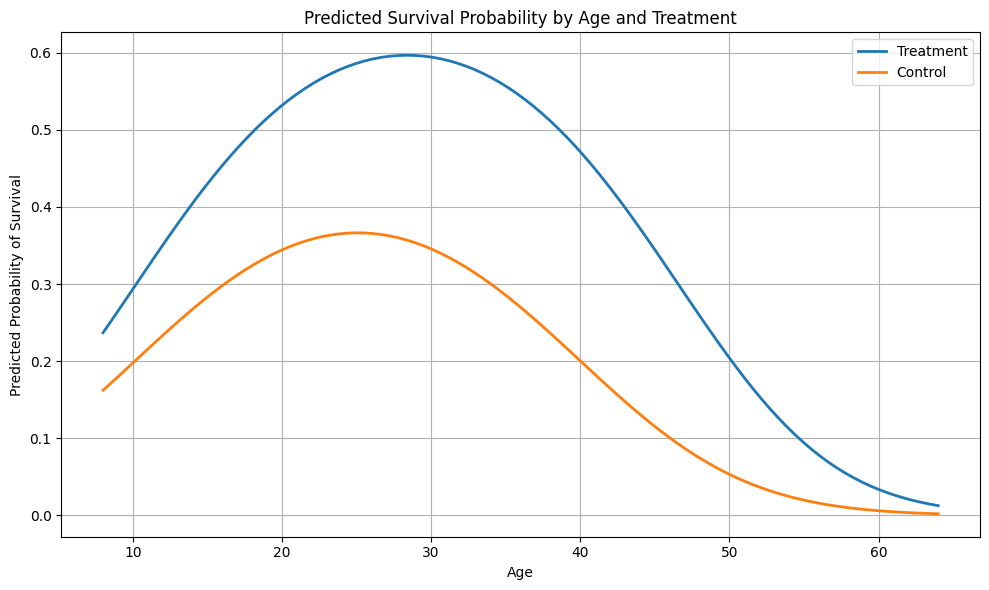

In [40]:
df_dummies['age_squared'] = df_dummies['age'] ** 2
df_dummies['interaction'] = df_dummies['age'] * df_dummies['transplant_treatment']
features = ['age', 'age_squared', 'transplant_treatment', 'interaction']
X4 = df_dummies[features]
y4 = df_dummies['y']

X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

model4 = LogisticRegression(max_iter=1000)
model4.fit(X_train, y_train)

y_pred_proba = model4.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)

print(f"Logistic regression AUC (test set): {auc:.3f}\n")

ages = np.linspace(df['age'].min(), df['age'].max(), 100)
plot_df = pd.DataFrame({'age': ages})
plot_df['age_squared'] = plot_df['age'] ** 2

plot_df['transplant_treatment'] = 1
plot_df['interaction'] = plot_df['age'] * plot_df['transplant_treatment']
treatment_probs = model4.predict_proba(plot_df)[:, 1]

plot_df['transplant_treatment'] = 0
plot_df['interaction'] = 0
control_probs = model4.predict_proba(plot_df)[:, 1]

plt.figure(figsize=(10, 6))
plt.plot(ages, treatment_probs, label='Treatment', linewidth=2)
plt.plot(ages, control_probs, label='Control', linewidth=2)
plt.xlabel("Age")
plt.ylabel("Predicted Probability of Survival")
plt.title("Predicted Survival Probability by Age and Treatment")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Those who received treatment have a higher probability of survival at all ages compared to those in the control group. The peak probabilty of survival for those with treatment is at age 30 while the peak for those in the control group is at age 25. 

5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?

Transparency and explainability are critical concerns. If the model is a "black box" with opaque logic, it becomes extremely difficult for patients and doctors to understand or challenge the decisions it makes. This lack of clarity erodes trust in the healthcare system. Moreover, the deployment of such a model by authoritative bodies like the CDC or NIH raises questions of accountability: who is responsible if the model makes a flawed recommendation that results in harm or death?

Additionally, models must be continuously monitored, audited, and updated to ensure they are functioning as intended and not causing harm. Input from a diverse range of stakeholders (patients, doctors, and communities) should be prioritized in the design and evaluation process. Without these safeguards, the use of algorithmic decision-making in organ allocation risks turning an already high-stakes medical process into one that is impersonal and potentially dangerous.

**Q5.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q6.** Let's explore multiple linear regression in a two-variable case, to build more intuition about what is happening.

Suppose the model is 
$$
\hat{y}_i = b_0 + b_1 z_{i1} + b_2 z_{i2}
$$
Assume that $z_{ij}$ is centered or de-meaned, so that $z_{ij} = x_{ij} - m_j$ where $m_j$ is the mean of variable $j$ and $x_{ij}$ is the original value of variable $j$ for observation $i$. Notice that this implies
$$
\dfrac{1}{N} \sum_{i=1}^N z_{ij} = 0
$$
which will simplify your calculations below substantially!

1. Write down the SSE for this model.
2. Take partial derivatives with respect to $b_0$, $b_1$, and $b_2$.
3. Verify that the average error is zero and $e \cdot z =0$ at the optimum, just as in the single linear regression case.
4. Show that the optimal intercept is $b_0^* = \bar{y}$. Eliminate $b_0^*$ from the remaining equations, and focus on $b_1$ and $b_2$.
5. Write your results as a matrix equation in the form "$Ab=C$". These are called the **normal equations**.
6. Divide both sides by $N$ and substitute $z_{ij} = x_{ij} - m_j$ back into your normal equations for $x_{ij}$. What is the matrix $A$? What is the vector $C$? Explain the intuition of your discovery.

**Q7.** In class, we showed that for the single linear regression model,
\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

1. When will $b^*$ be large or small, depending on the relationship between $X$ and $Y$ and the variance of $X$?
2. Suppose you have measurement error in $X$ which artificially inflates its variance (e.g. bad data cleaning). We'll model this as saying the "real" value of $X$ for observation $i$ is $z_i$, but we observe $x_i = z_i + n_i$, where $n_i$ is the added noise. Does this affect the intercept of the regression? What happens to the $b^*$ coefficient relative to a noise-less model? How will affect your ability to predict? (This phenomenon is called **attenuation**.) 
3. Suppose the noise $n_i$ is independent of $z_i$ and $y_i$, so that (approximately)
$$
\dfrac{1}{N} \sum_{i=1}^N (y_i - \bar{y})(n_i - \bar{n}) =0, \quad \dfrac{1}{N} \sum_{i=1}^N (z_i - \bar{z})(n_i - \bar{n}) =0.
$$
and that the mean of the bias is zero, so that
$$
\dfrac{1}{N} \sum_{i=1}^N n_i = 0.
$$
In this case, the noise $n_i$ is zero on average and independent of the values of $x_i$ and $y_i$: It's just measurement error or lazy data cleaning.
Explain the intuition of your result. 

4. How does attenuation factor into the cost-benefit analysis of gathering higher quality data or cleaning it more carefully?

**Q8.**
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?

**Q9.** There is a folder called `heart_failure` which contains reasonably detailed health data on patients and whether they die of congestive heart failure. 

1. Load the data and perform an 80/20-train/test split.
2. Using dummy/one-hot-encoded variables and transformations of the numeric features, build the best model you can. **But**, do not delete code chunks or revise your work substantially as you experiment. Just keep moving forward with your ideas and experiments.
3. When you're done, scroll through your notebook. What worked and what didn't? Does your code have intention, or are you randomly experimenting? If you had to do this again, what might you do differently to get to a good model faster?


**Q10.** Let's look at a cousin of Linear Regression, called **kernel regression** or **local constant least squares** or **Nadaraya-Watson Estimator**.

We derived the OLS estimator for single linear regression by minimizing
$$
SSE(b_0, b_1) = \frac{1}{N}\sum_{i=1}^N (y_i - b_0 - b_1 x_i)^2
$$
with solution
$$
\hat{b}_0 = \bar{y} - \hat{b}_1 \bar{x}, \quad \hat{b}_1 = \dfrac{\frac{1}{N} \sum_{i=1}^N (x_i-\bar{x})(y_i - \bar{y})}{s_x^2}.
$$

When you step back and think about it, this is a bit weird: The algorithm is computing sample means, variances, and covariances, and using those to create a predictive model. The data themselves arguably vanish from the solution. This is elegant, this is strange.

Instead, let $k(z)$ be a kernel function, such as the Gaussian
$$
k(z) = \frac{1}{\sqrt{2\pi}} e^{-z^2/2}
$$
or uniform
$$
k(z) = \begin{cases}
1/2, & |z| \le \frac{1}{2}\\
0, & \text{otherwise.}
\end{cases}
$$
We'll instead minimize, or each predictor value $x$,
$$
SSE(\hat{y}(x)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(x)\right\rbrace^2 \dfrac{1}{h} k \left( \dfrac{x-x_i}{h} \right).
$$

1. Show that the optimal predictor is
$$
\hat{y}(x) = \dfrac{ \frac{1}{Nh} \sum_{i=1}^N  y_i k \left( \dfrac{x-x_i}{h} \right) }{\frac{1}{Nh} \sum_{i=1}^N k \left(  \dfrac{x-x_i}{h} \right)}
$$
This has many names, but let's call it the local constant least squares (LCLS) estimator, as opposed to ordinary least squares (OLS).

2. Compare and contrast LCLS with both OLS and $k$-Nearest Neighbor as a regression algorithm. 

3. Write a function or class that implements the LCLS estimator for a single predictor variable $x$. For a default bandwidth $h$, you can use the maximum of the Silverman plug-ins for estimating kernel densities for $X$ and $Y$:
$$
h_y = 1.06 \times s_y^{-1/5}, \quad h_x = 1.06 \times s_x^{-1/5},
$$
$$
h = \max \{ h_y, h_x \}.
$$
For the kernel, you can hard-code the uniform, Gaussian, or Epanechnikov, or make it a parameter the user can adjust with a default choice.

4. For one of the datasets available for the homework, use your LCLS estimator from part 3 to predict values $\hat{y}(x_i)$ for each datapoint $x_i$. Plot your estimator $\hat{y}$ as a line over a scatterplot of the data $\{(x_i,y_i)\}_{i=1}^N$. Tune the bandwidth until you 

5. Conceptually, how would you extend this analysis to a vector of predictors, $x = (x_1, ..., x_L)$ instead of just one explanatory variable $x$?
